# **Maximizing Revenue for Cab Drivers through analysing Payment Type -**

# *Problem Statement:*


In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.


# *Project Objective:*

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.



# *Question to explore:*
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# 1.Importing Libraries

In [791]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statistics as stat
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 2.Loading the Data

In [793]:
df=pd.read_parquet('Downloads/yellow_tripdata_2024-01.parquet')
df.to_csv('yellow_tripdata_2024-01.csv')

In [794]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


2.1 Data Description:

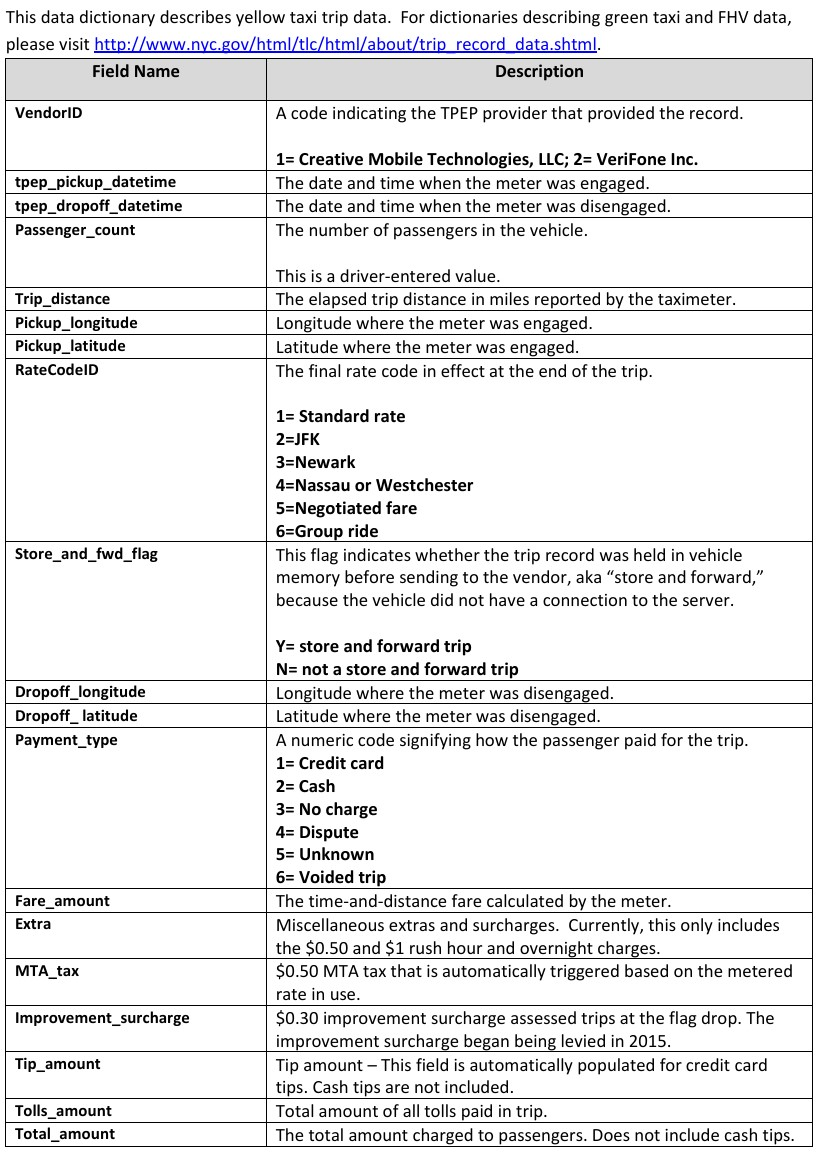

In [931]:
from IPython import display
display.Image('NYC TAXI.jpg')

# 3.Exploratory Data Analysis

In [797]:
df.shape

(2964624, 19)

In [799]:
#Calculating Duration
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [801]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,0 days 00:19:48
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,0 days 00:06:36
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,0 days 00:17:55
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,0 days 00:08:18
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,0 days 00:06:06


In [803]:
#Conveting the time to minutes
df['duration']=df['duration'].dt.total_seconds()/60

In [805]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000


Filtering only the required columns for analysis of the problem statement

In [808]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,2,17.7,1.72,19.800000
1,1.0,1,10.0,1.80,6.600000
2,1.0,1,23.3,4.70,17.916667
3,1.0,1,10.0,1.40,8.300000
4,1.0,1,7.9,0.80,6.100000


In [810]:
df.isnull().sum()

passenger_count    140162
payment_type            0
fare_amount             0
trip_distance           0
duration                0
dtype: int64

In [812]:
#checking the length pf missing values as compared to the dataframe
(140162/len(df))*100

4.727817085741734

In [814]:
#since the percentage is very less - Drop the nulls
df.dropna(inplace=True)

In [816]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,2,17.7,1.72,19.800000
1,1.0,1,10.0,1.80,6.600000
2,1.0,1,23.3,4.70,17.916667
3,1.0,1,10.0,1.40,8.300000
4,1.0,1,7.9,0.80,6.100000


In [818]:
#converting the passanger_count which is in float to interger(int64)
df['passanger_count']=df['passenger_count'].astype('int64')

In [820]:
#checking for duplicates
df[df.duplicated]

,passenger_count,payment_type,fare_amount,trip_distance,duration,passanger_count
1028,2.0,1,6.5,0.70,4.816667,2
2594,2.0,1,5.8,0.75,3.250000,2
2795,3.0,1,8.6,0.81,7.983333,3
2996,1.0,1,12.8,2.06,11.033333,1
3386,1.0,1,9.3,1.52,6.633333,1
...,...,...,...,...,...,...
2824449,1.0,1,10.0,1.28,9.033333,1
2824450,1.0,2,70.0,0.00,0.116667,1
2824452,1.0,1,19.1,3.50,17.300000,1
2824455,1.0,1,11.4,1.94,8.833333,1


In [822]:
df.drop_duplicates(inplace=True)

In [824]:
df.shape

(1682947, 6)

# 4.Checking Data Distribution

4.1: Handling Categorical Data

In [828]:
df['passenger_count'].value_counts(normalize=True)  #normalize=True shows in percentage

passenger_count
1.0    6.851945e-01
2.0    1.874284e-01
3.0    5.001821e-02
4.0    2.961769e-02
5.0    1.926858e-02
0.0    1.545563e-02
6.0    1.298496e-02
8.0    2.673881e-05
7.0    4.753566e-06
9.0    5.941958e-07
Name: proportion, dtype: float64

From the above we can see that there are a few outliers like 8,7,9 and  0 as passenger count cant be 0. 

In [831]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    0.759831
2    0.205349
4    0.025424
3    0.009396
Name: proportion, dtype: float64

3 and 4 payment type can be treated as Outliers.

Hence fintering our data more:-

In [834]:
df=df[(df['passenger_count']<7) & (df['passenger_count']>0)]
df=df[df['payment_type']<3]

Replacing 1 as Card and 2 as Cash (According to Dataset's info)

In [837]:
df['payment_type'].replace([1,2],['Credit Card','Cash'],inplace=True)
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration,passanger_count
0,1.0,Cash,17.7,1.72,19.800000,1
1,1.0,Credit Card,10.0,1.80,6.600000,1
2,1.0,Credit Card,23.3,4.70,17.916667,1
3,1.0,Credit Card,10.0,1.40,8.300000,1
4,1.0,Credit Card,7.9,0.80,6.100000,1


4.2: Handling Numerical Data

In [840]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration,passanger_count
count,1.599354e+06,1.599354e+06,1.599354e+06,1.599354e+06,1.599354e+06
mean,1.533347e+00,2.412369e+01,4.636215e+00,2.056470e+01,1.533347e+00
std,1.022717e+00,2.110753e+01,1.592033e+01,4.635207e+01,1.022717e+00
min,1.000000e+00,-8.990000e+02,0.000000e+00,-1.356667e+01,1.000000e+00
25%,1.000000e+00,1.140000e+01,1.400000e+00,1.006667e+01,1.000000e+00
50%,1.000000e+00,1.700000e+01,2.500000e+00,1.601667e+01,1.000000e+00
75%,2.000000e+00,2.890000e+01,5.310000e+00,2.425000e+01,2.000000e+00
max,6.000000e+00,2.221300e+03,1.540032e+04,9.455400e+03,6.000000e+00


In [842]:
#ensuring only +ve values
df=df[df['fare_amount']>0]
df=df[df['duration']>0]

In [844]:
#removing Outliers using IQR method
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
def remove_outliers(df, columns):    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (2 * IQR)
        upper_bound = Q3 + (2 * IQR)
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  
    return df
df_clean = remove_outliers(df, numeric_columns)
df_clean.describe()

,passenger_count,fare_amount,trip_distance,duration,passanger_count
count,1.304256e+06,1.304256e+06,1.304256e+06,1.304256e+06,1.304256e+06
mean,1.403326e+00,1.756407e+01,2.846363e+00,1.546243e+01,1.403326e+00
std,7.352396e-01,9.044442e+00,2.212842e+00,8.041625e+00,7.352396e-01
min,1.000000e+00,1.000000e-02,0.000000e+00,1.666667e-02,1.000000e+00
25%,1.000000e+00,1.070000e+01,1.300000e+00,9.416667e+00,1.000000e+00
50%,1.000000e+00,1.560000e+01,2.190000e+00,1.446667e+01,1.000000e+00
75%,2.000000e+00,2.190000e+01,3.620000e+00,2.036667e+01,2.000000e+00
max,4.000000e+00,6.600000e+01,1.008000e+01,4.308333e+01,4.000000e+00


Now we can see all the outliers have been filtered out

In [946]:
df_clean.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration,passanger_count
0,1.0,Cash,17.7,1.72,19.800000,1
1,1.0,Credit Card,10.0,1.80,6.600000,1
2,1.0,Credit Card,23.3,4.70,17.916667,1
3,1.0,Credit Card,10.0,1.40,8.300000,1
4,1.0,Credit Card,7.9,0.80,6.100000,1


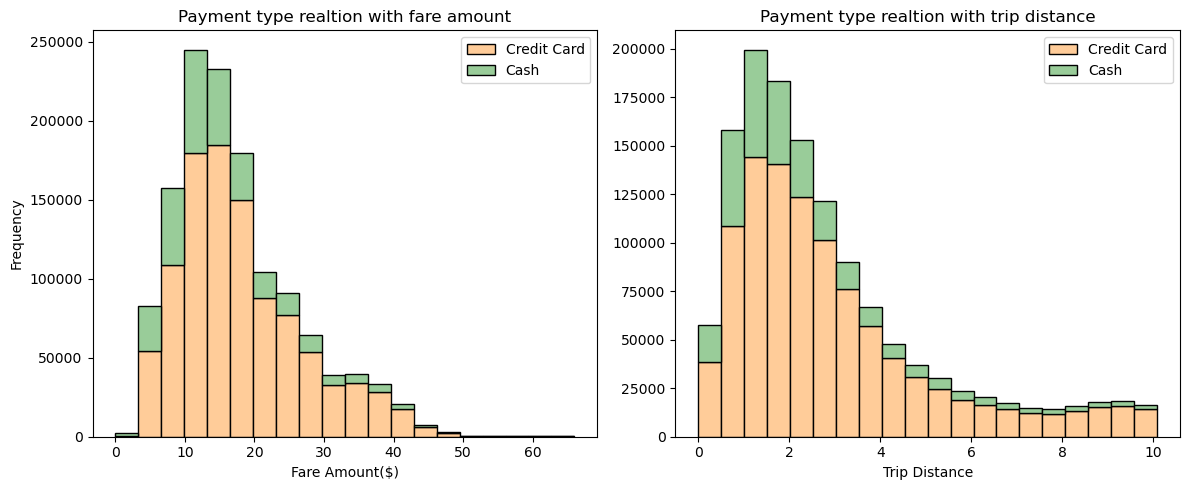

In [948]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist([df_clean[df_clean['payment_type']=='Credit Card']['fare_amount'], 
          df_clean[df_clean['payment_type']=='Cash']['fare_amount']],bins=20,
         histtype='barstacked', color = ["#FFCC99","#99CC99"], label=['Credit Card', 'Cash'],edgecolor='k')
plt.xlabel('Fare Amount($)')
plt.ylabel('Frequency')
plt.title('Payment type realtion with fare amount')
plt.legend()
plt.tight_layout()

plt.subplot(1,2,2)
plt.hist([df_clean[df_clean['payment_type']=='Credit Card']['trip_distance'],
          df_clean[df_clean['payment_type']=='Cash']['trip_distance']],bins=20,
           histtype='barstacked',color = ["#FFCC99","#99CC99"],label=['Credit Card','Cash'],edgecolor='k')
plt.xlabel('Trip Distance')
plt.title('Payment type realtion with trip distance')
plt.legend()
plt.tight_layout()


In [859]:
#Calculating mean and stabdard deviation
df_payment_statsdf_clean.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

In [861]:
df_payment_stats

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Cash           15.320752  8.523019      2.390504  2.049963
Credit Card    18.190129  9.086361      2.973583  2.239702

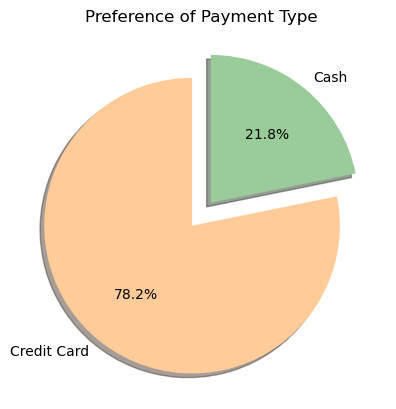

In [915]:
#Preference of Payment Type
plt.title('Preference of Payment Type')
explode=[0.1,0.1]
plt.pie(df_clean['payment_type'].value_counts(),labels=df_clean['payment_type'].value_counts().index,autopct='%1.1f%%',colors = ["#FFCC99","#99CC99"],
       explode=explode,startangle=90,shadow=True)
plt.show()

In [867]:
passenger_count=df_clean.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count

passenger_count
payment_type passenger_count                 
Cash         1.0                       206546
             2.0                        53398
             3.0                        14265
             4.0                        10361
Credit Card  1.0                       726027
             2.0                       205159
             3.0                        57630
             4.0                        30870

In [869]:
#renaming the only column (as rest are index)
passenger_count.rename(columns={'passenger_count':'total_count'},inplace=True)

In [871]:
#since it is a multiinex we will convert it into single index
passenger_count.reset_index(inplace=True)
passenger_count

,payment_type,passenger_count,total_count
0,Cash,1.0,206546
1,Cash,2.0,53398
2,Cash,3.0,14265
3,Cash,4.0,10361
4,Credit Card,1.0,726027
5,Credit Card,2.0,205159
6,Credit Card,3.0,57630
7,Credit Card,4.0,30870


In [873]:
passenger_count['perc']=(passenger_count.total_count/passenger_count.total_count.sum())*100
passenger_count

,payment_type,passenger_count,total_count,perc
0,Cash,1.0,206546,15.836308
1,Cash,2.0,53398,4.094135
2,Cash,3.0,14265,1.093727
3,Cash,4.0,10361,0.794399
4,Credit Card,1.0,726027,55.665989
5,Credit Card,2.0,205159,15.729964
6,Credit Card,3.0,57630,4.418611
7,Credit Card,4.0,30870,2.366867


For a Stacked Bar chart

In [875]:
stacked_df=pd.DataFrame(columns=['payment_type',1,2,3,4],)
stacked_df['payment_type']=['Credit Card','Cash']
stacked_df.iloc[0,1:]=passenger_count.iloc[4:,3]
stacked_df.iloc[1,1:]=passenger_count.iloc[:4,3]

In [877]:
stacked_df

,payment_type,1,2,3,4
0,Credit Card,55.665989,15.729964,4.418611,2.366867
1,Cash,15.836308,4.094135,1.093727,0.794399


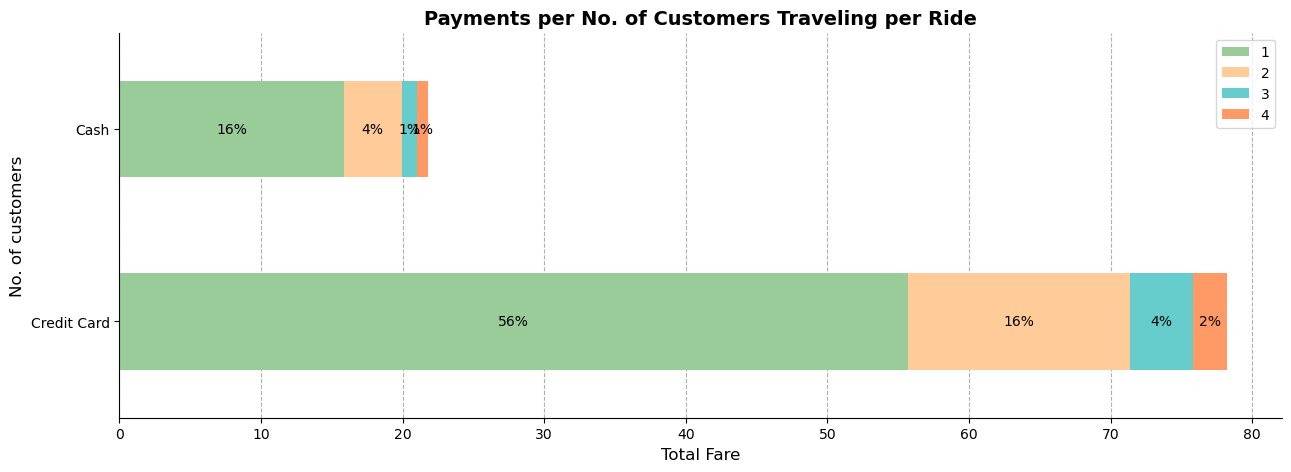

In [956]:
colors = ["#99CC99", "#FFCC99", "#66CCCC", "#FF9966"]
fig, ax = plt.subplots(figsize=(15, 5))
stacked_df.plot(x='payment_type', kind='barh', stacked=True, ax=ax, color=colors)
# Adding percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')
ax.set_title("Payments per No. of Customers Traveling per Ride", fontsize=14, fontweight='bold')
ax.set_xlabel("Total Fare", fontsize=12)
ax.set_ylabel("No. of customers", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', linestyle='--')
ax.set_axisbelow(True)

plt.show()


# Hypothesis Testing

1. **Null Hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash

2. **Alternative Hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash

Checking for Normal Distribution: (have a QQ plot):


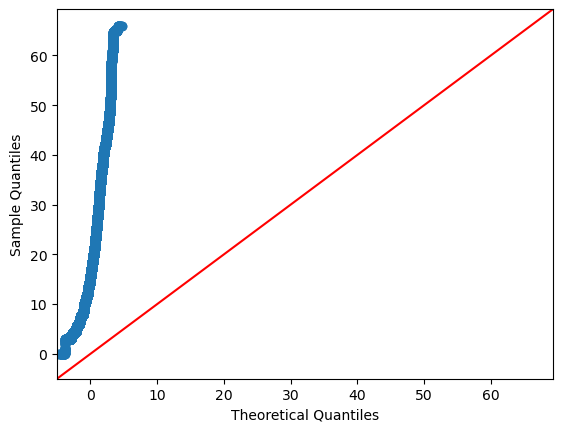

In [881]:
sm.qqplot(df_clean['fare_amount'],line='45')
plt.show()

As we can see that the data doesnt aligns with the straight line , So DATA is not Normally distributed, also since we do not have population mean ,so we will use:  "**t-test**"

In [883]:
card_sample=df_clean[df_clean['payment_type']=='Cash']['fare_amount']
cash_sample=df_clean[df_clean['payment_type']=='Credit Card']['fare_amount']

2 sample T-Test

In [893]:
t_stats,p_value=st.ttest_ind(a=cash_sample,b=card_sample,equal_var=False)
print('T Statistic result is: {} and P-Value result is: {}'.format(t_stats,p_value))

T Statistic result is: 156.48220931877682 and P-Value result is: 0.0


Since we got the P-Value as 0.0 which is very less than 0.05 (95% Confidence Interval) , we **REJECT THE NULL HYPOTHESIS** and **ACCEPT THE ALTERNATE HYPOTHESIS**.

So we can say that ***YES There is a huge difference in average fare between customers who use credit cards and customers who use cash***

In [901]:
mean_fare_card = df_clean[df_clean['payment_type'] == 'Credit Card']['fare_amount'].mean()
mean_fare_cash = df_clean[df_clean['payment_type'] == 'Cash']['fare_amount'].mean()

difference_in_means = mean_fare_card - mean_fare_cash

print(f"The average fare for credit card users is ${mean_fare_card:.2f}")
print(f"The average fare for cash users is ${mean_fare_cash:.2f}")
print(f"The difference in average fare is ${difference_in_means:.2f}")

The average fare for credit card users is $18.19
The average fare for cash users is $15.32
The difference in average fare is $2.87


In [899]:
# Separating the fare amounts for each payment type
card_fares = df_clean[df_clean['payment_type'] == 'Credit Card']['fare_amount']
cash_fares = df_clean[df_clean['payment_type'] == 'Cash']['fare_amount']
# Calculate confidence intervals 
card_ci = st.t.interval(0.95, len(card_fares) - 1, loc=card_fares.mean(), scale=st.sem(card_fares))
cash_ci = st.t.interval(0.95, len(cash_fares) - 1, loc=cash_fares.mean(), scale=st.sem(cash_fares))
print("95% Confidence Interval for Card Fares:", card_ci)
print("95% Confidence Interval for Cash Fares:", cash_ci)


95% Confidence Interval for Card Fares: (18.17249275589228, 18.207765186258527)
95% Confidence Interval for Cash Fares: (15.28943712975135, 15.352066612737312)
